# TASK 1 : Import Libraries

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [1]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 32.52 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')
#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')


#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names)

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names)

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names)

test_normal_names = os.listdir(test_normal_dir)
print(test_covid_names)

['COVID19(239).jpg', 'COVID-19 (191).jpg', 'COVID19(156).jpg', 'COVID-19 (6).jpg', 'COVID19(367).jpg', 'COVID19(187).jpg', 'COVID19(544).jpg', 'COVID19(531).jpg', 'COVID19(416).jpg', 'COVID19(452).jpg', 'COVID19(295).jpg', 'COVID-19 (20).jpeg', 'COVID19(135).jpg', 'COVID19(150).jpg', 'COVID-19 (107).jpg', 'COVID19(575).jpg', 'COVID19(270).jpg', 'COVID19(407).jpg', 'COVID19(15).jpg', 'COVID19(20).jpg', 'COVID19(264).jpg', 'COVID19(273).jpg', 'COVID-19 (263).jpg', 'COVID19(497).jpg', 'COVID19(540).jpg', 'COVID19(228).jpg', 'COVID19(283).jpg', 'COVID19(10).jpg', 'COVID19(342).jpg', 'COVID-19 (14).jpeg', 'COVID19(567).jpg', 'COVID19(138).jpg', 'COVID19(130).jpg', 'COVID19(62).jpg', 'COVID19(504).jpg', 'COVID-19 (1).jpeg', 'COVID19(222).jpg', 'COVID19(501).jpg', 'COVID19(274).jpg', 'COVID19(440).jpg', 'COVID19(303).jpg', 'COVID19(212).jpg', 'COVID19(67).jpg', 'COVID19(14).jpg', 'COVID19(434).jpg', 'COVID19(87).jpg', 'COVID19(205).jpg', 'COVID19(155).jpg', 'COVID-19 (173).jpg', 'COVID19(144)

In [5]:
#print the total no of images present in each dir
print("Total number of images present in Train Dataset :", len(train_covid_names+train_normal_names))

print("Total number of images present in Test Dataset :", len(test_covid_names+test_normal_names))

Total number of images present in Train Dataset : 1811
Total number of images present in Test Dataset : 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(239).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (191).jpg', '/content/datasets/Data/train/COVID19/COVID19(156).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (6).jpg', '/content/datasets/Data/train/COVID19/COVID19(367).jpg', '/content/datasets/Data/train/COVID19/COVID19(187).jpg', '/content/datasets/Data/train/COVID19/COVID19(544).jpg', '/content/datasets/Data/train/COVID19/COVID19(531).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(777).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1169).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1128).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1311).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(918).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(842).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(57).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1092).jpg']


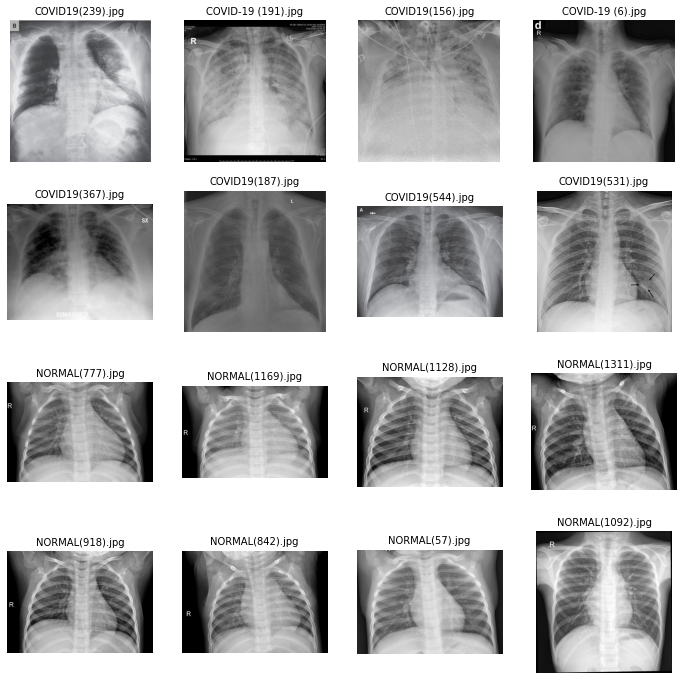

In [9]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pics = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pics = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

#print the list
print(covid_pics)
print(normal_pics)

#merge the covid and normal list
merged_list = covid_pics + normal_pics
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize= 10)
  plt.imshow(img, cmap='gray')

plt.show()




# TASK 4 : Data Preprocessing & Augmentation

In [13]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale= 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 1811 images belonging to 2 classes.


In [14]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [15]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [18]:
#Initialize a model instannce
model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5), padding = 'SAME', activation='relu',input_shape= (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(54,(5,5), padding='SAME', activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 54)        43254     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 54)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 54)        0

# TASK 6 : Compile & Train the Model

In [22]:
#compile the model
model.compile(Adam(lr=0.001), loss= 'binary_crossentropy', metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)


Epoch 1/30
46/46 [==============================] - 156s 3s/step - loss: 0.9067 - accuracy: 0.7564 - val_loss: 0.2688 - val_accuracy: 0.9061
Epoch 2/30
46/46 [==============================] - 146s 3s/step - loss: 0.2038 - accuracy: 0.9317 - val_loss: 0.3337 - val_accuracy: 0.8867
Epoch 3/30
46/46 [==============================] - 146s 3s/step - loss: 0.1594 - accuracy: 0.9455 - val_loss: 0.2140 - val_accuracy: 0.9475
Epoch 4/30
46/46 [==============================] - 150s 3s/step - loss: 0.1571 - accuracy: 0.9482 - val_loss: 0.1949 - val_accuracy: 0.9641
Epoch 5/30
46/46 [==============================] - 148s 3s/step - loss: 0.1540 - accuracy: 0.9503 - val_loss: 0.1740 - val_accuracy: 0.9641
Epoch 6/30
46/46 [==============================] - 146s 3s/step - loss: 0.1315 - accuracy: 0.9545 - val_loss: 0.1522 - val_accuracy: 0.9696
Epoch 7/30
46/46 [==============================] - 150s 3s/step - loss: 0.1336 - accuracy: 0.9558 - val_loss: 0.1066 - val_accuracy: 0.9724
Epoch 8/30
46

# TASK 7 : Performance Evaluation

In [24]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

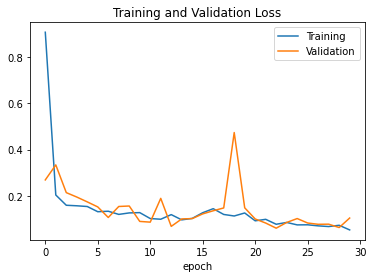

In [25]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

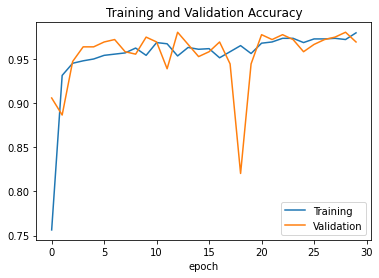

In [26]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [27]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss : {}, test_accuracy :{}'.format(test_loss, test_acc))

57/57 [==============================] - 80s 1s/step - loss: 0.0564 - accuracy: 0.9867
test_loss : 0.05638818070292473, test_accuracy :0.986747682094574


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content'+filename
  img = image.load_img(img_path,target_size=(150,150))
  images = images.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0 :
    print('covid detected')
  else:
    print('Your report is normal')
